<a href="https://colab.research.google.com/github/RamrayWong/atx-housing/blob/main/austin_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/RamrayWong/atx-housing/main/austinHousingData.csv')

In [4]:
print(data.shape)
data.head()


(15171, 47)


,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [5]:
# Get data types of all cols
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15171 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

In [6]:
# Identify the object cols
print(data.select_dtypes(['object']).columns)

Index(['city', 'streetAddress', 'description', 'homeType', 'latest_saledate',
       'latestPriceSource', 'homeImage'],
      dtype='object')


In [7]:
# Convert the objects to categorical to save memory
for col in ['city', 'streetAddress', 'description', 'homeType', 'latest_saledate','latestPriceSource', 'homeImage']:
  data[col] = data[col].astype('category')

In [8]:
data['zipcode'] = data['zipcode'].astype('category')

In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
zpid,15171.0,1.044193e+08,3.179426e+08,2.858495e+07,2.941115e+07,2.949441e+07,7.033762e+07,2.146313e+09
latitude,15171.0,3.029160e+01,9.697306e-02,3.008503e+01,3.020331e+01,3.028442e+01,3.036658e+01,3.051732e+01
longitude,15171.0,-9.777853e+01,8.471490e-02,-9.802206e+01,-9.783801e+01,-9.776954e+01,-9.771790e+01,-9.756950e+01
propertyTaxRate,15171.0,1.994085e+00,5.310204e-02,1.980000e+00,1.980000e+00,1.980000e+00,1.980000e+00,2.210000e+00
garageSpaces,15171.0,1.229187e+00,1.352117e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,2.200000e+01
parkingSpaces,15171.0,1.224507e+00,1.352732e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,2.200000e+01
yearBuilt,15171.0,1.988555e+03,2.157946e+01,1.905000e+03,1.974000e+03,1.993000e+03,2.006000e+03,2.020000e+03
latestPrice,15171.0,5.127677e+05,4.531853e+05,5.500000e+03,3.090000e+05,4.050000e+05,5.750000e+05,1.350000e+07
numPriceChanges,15171.0,3.032892e+00,2.487392e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,2.300000e+01
latest_salemonth,15171.0,6.733043e+00,3.146760e+00,1.000000e+00,4.000000e+00,7.000000e+00,9.000000e+00,1.200000e+01


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   zpid                        15171 non-null  int64   
 1   city                        15171 non-null  category
 2   streetAddress               15171 non-null  category
 3   zipcode                     15171 non-null  category
 4   description                 15171 non-null  category
 5   latitude                    15171 non-null  float64 
 6   longitude                   15171 non-null  float64 
 7   propertyTaxRate             15171 non-null  float64 
 8   garageSpaces                15171 non-null  int64   
 9   hasAssociation              15171 non-null  bool    
 10  hasCooling                  15171 non-null  bool    
 11  hasGarage                   15171 non-null  bool    
 12  hasHeating                  15171 non-null  bool    
 13  hasSpa          

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(-50, 30, 'Max: 13500000.0')

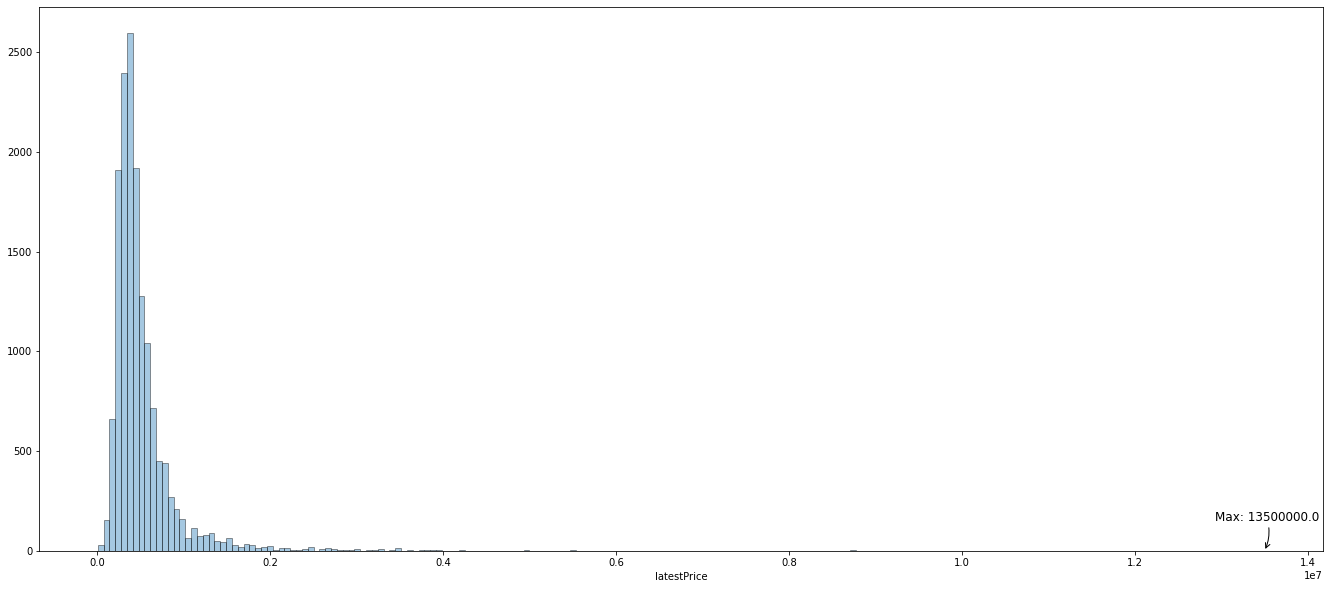

In [11]:
# Histogram plot of latest prices of properties
# We observe this variable to be skewed to the right.

plt.figure(figsize=(23,10))
sns.distplot(data['latestPrice'], kde = False, bins=200, hist_kws=dict(edgecolor="k"))

# Get the maximum value
max_value = data['latestPrice'].max()

# Label the maximum value
plt.annotate(f'Max: {max_value}', xy=(max_value, 0), xycoords='data', xytext=(-50, 30),
             textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2"))

In [12]:
# CATEGORICAL FEATURES
data.select_dtypes(['category']).columns

Index(['city', 'streetAddress', 'zipcode', 'description', 'homeType',
       'latest_saledate', 'latestPriceSource', 'homeImage'],
      dtype='object')

In [13]:
# Prices above 3 million will be dropped
data.drop(data[data['latestPrice']>3000000].index, inplace=True)

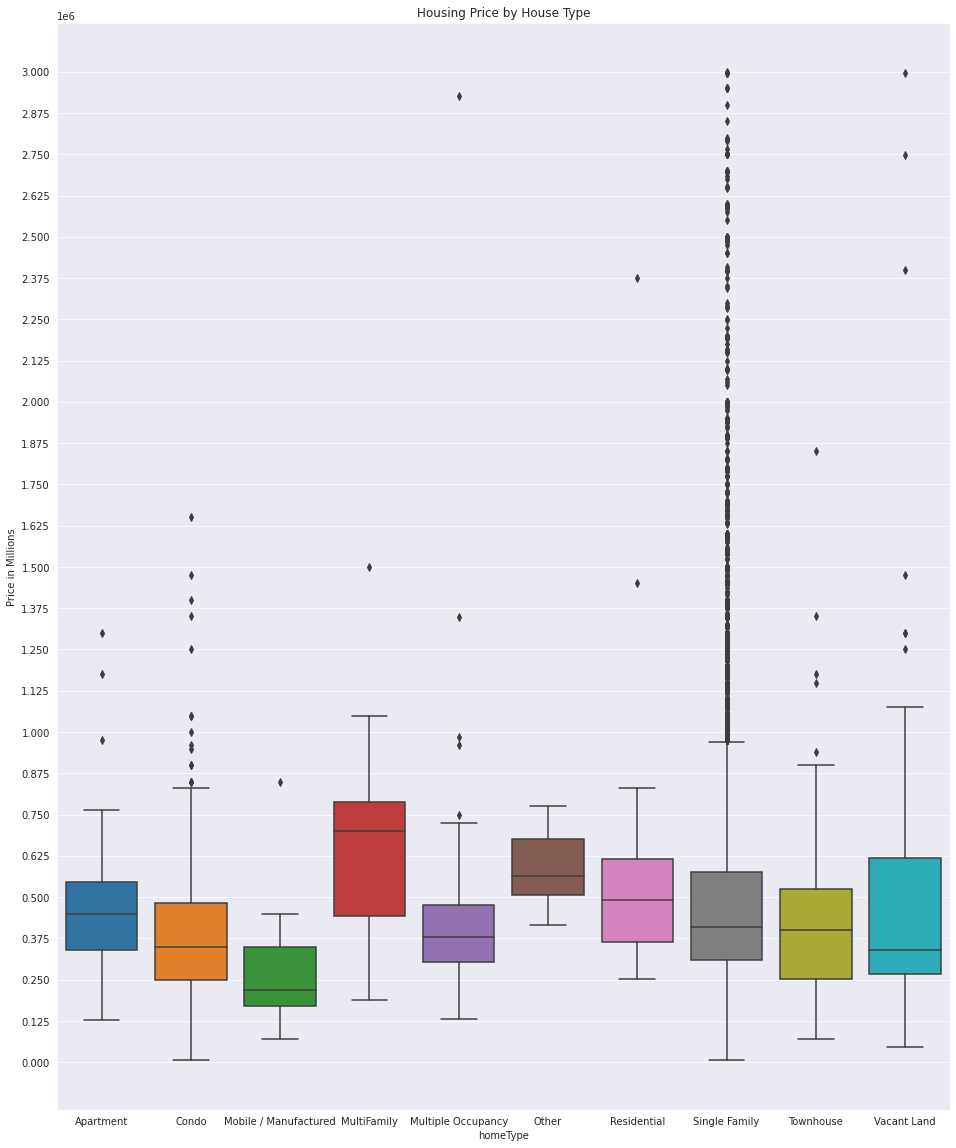

In [14]:
# Set the figure size
plt.figure(figsize=(16,20))

# Create a box plot
sns.set_style('darkgrid')
sns.boxplot(x='homeType', y='latestPrice', data=data)

# Add a title and labels
plt.title('Housing Price by House Type')
plt.xlabel('homeType')
plt.ylabel('Price in Millions')

# Increase the increment of the y-axis labels
plt.yticks(range(0, int(data['latestPrice'].max())+10000, 125000))

# Show the plot
plt.show()

In [15]:
# Insights:
#  Median price for Single Family homes is approx. $400,000
#  Mobile/Manufactured homes has the lowest median price at apporox $225,000
#  Multi-family homes have the highest median price betwen $700,000 and $750,000

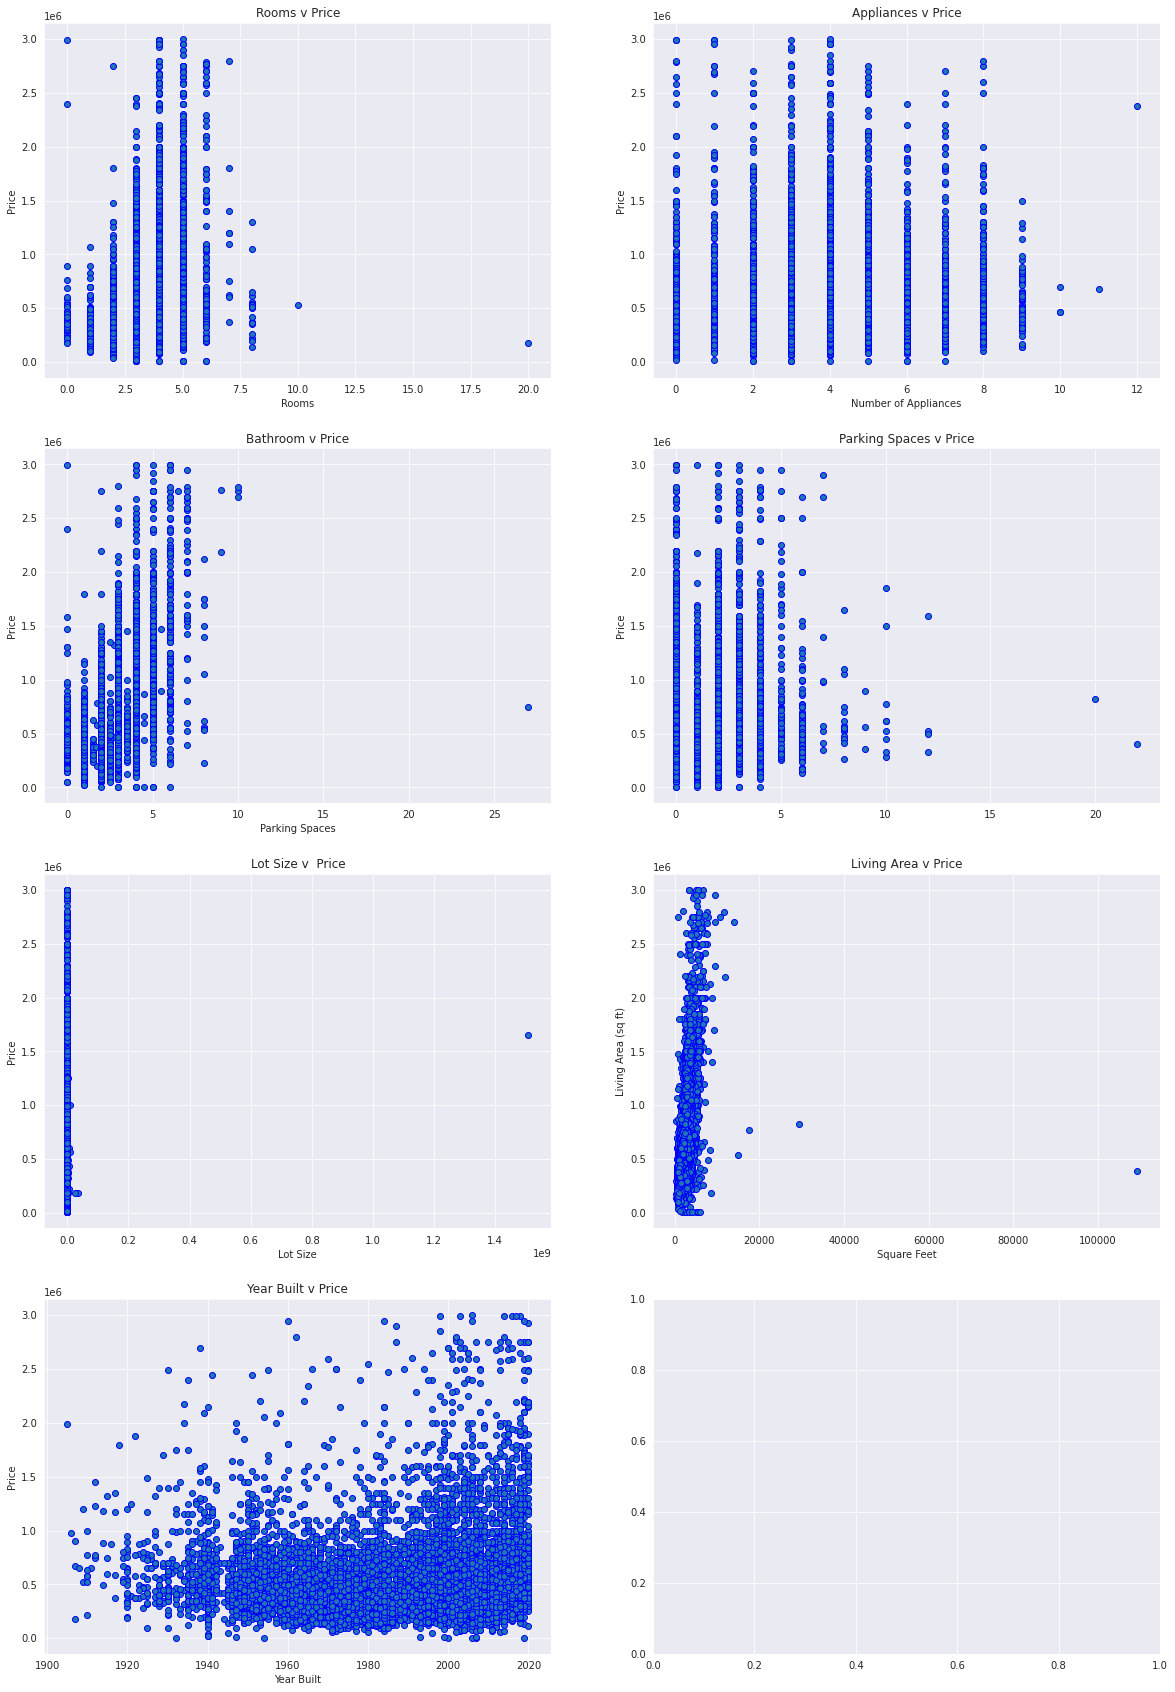

In [16]:
# Suplots of numeric features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'numOfBedrooms', y = 'latestPrice', data = data, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'numOfAppliances', y = 'latestPrice', data = data, edgecolor = 'b')
axes[0,1].set_xlabel('Number of Appliances')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Appliances v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'numOfBathrooms', y = 'latestPrice', data = data, edgecolor = 'b')
axes[1,0].set_xlabel('Bathrooms')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

# Plot [1,1]
axes[1,1].scatter(x = 'parkingSpaces', y = 'latestPrice', data = data, edgecolor = 'b')
axes[1,0].set_xlabel('Parking Spaces')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Parking Spaces v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'lotSizeSqFt', y = 'latestPrice', data = data, edgecolor = 'b')
axes[2,0].set_xlabel('Lot Size')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Lot Size v  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'livingAreaSqFt', y = 'latestPrice', data = data, edgecolor = 'b')
axes[2,1].set_xlabel('Square Feet')
axes[2,1].set_ylabel('Living Area (sq ft)')
axes[2,1].set_title('Living Area v Price')

# Plot [3,0]
axes[3,0].scatter(x = 'yearBuilt', y = 'latestPrice', data = data, edgecolor = 'b')
axes[3,0].set_xlabel('Year Built')
axes[3,0].set_ylabel('Price')
axes[3,0].set_title('Year Built v Price')


plt.show()

In [17]:
# Removing Outliers in Lot Size and Living Area
def iqr_outliers(column):
    """return the lower range and upper range for the data based on IQR*1.6"""
    Q1,Q3 = np.percentile(column , [25,75])
    iqr = Q3 - Q1
    lower_range = Q1 - (1.6 * iqr)
    upper_range = Q3 + (1.6 * iqr)
    return lower_range,upper_range  

In [18]:
# determing our IQR for price, lot size, sq footage and longitude
lotlower,lotupper = iqr_outliers(data.lotSizeSqFt)
sqftlower, sqftupper = iqr_outliers(data.livingAreaSqFt)

# dropping the things outside of our lower and upper range
data.drop(data[ (data.lotSizeSqFt > lotupper) | (data.lotSizeSqFt < lotlower) ].index , inplace=True)
data.drop(data[ (data.livingAreaSqFt > sqftupper) | (data.livingAreaSqFt < sqftlower) ].index , inplace=True)


In [19]:
# check the high  bathroom point
data.sort_values('numOfBathrooms', ascending=False).head(5)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
2838,111972888,austin,4212 Far West Blvd,78731,Well-maintained home in highly desirable North...,30.361406,-97.769707,1.98,2,False,...,1,1,0.933333,7.000000,1483,16,27.0,4,1,111972888_a88e572d95e496b1b5d9a591800497c4-p_f...
7023,29488178,austin,5903 Cougar Dr,78745,Fantastic VALUE ADD opportunity in a trendy ar...,30.206968,-97.786041,1.98,8,False,...,1,1,0.633333,4.000000,925,14,8.0,8,2,29488178_7f5e1589da0201c82b87f8364946d42f-p_f.jpg
8664,58305149,austin,4411 Whispering Valley Dr,78727,Close to exploding economic development (Appl...,30.413445,-97.730507,1.98,0,False,...,1,1,2.566667,6.666667,1486,15,8.0,8,2,58305149_39c7d1adff620c7e0b1783cda98d5551-p_f.jpg
3452,29427358,austin,1912 Hearthside Dr,78757,RENOVATED 4PLEX! - Very large townhouse style ...,30.366327,-97.722427,1.98,8,False,...,1,1,0.666667,4.000000,1019,14,8.0,8,2,29427358_9c16b7f1a2174551ced0a604b877991a-p_f.jpg
3509,29427322,austin,8626 Fireside Dr,78757,RENOVATED 4PLEX!! -- Very large townhouse styl...,30.368061,-97.722733,1.98,10,False,...,1,1,0.733333,4.000000,1019,14,8.0,8,2,29427322_6dd8fc73affe1191b66f889971e9aeb9-p_f.jpg


In [20]:
# Remove extremely high bathroom outlier
data.loc[data.index==2838, 'numOfBathrooms'] = 2.5

In [21]:
# Some listings with 0 bathrooms also have 0 bedrooms. Let's replace them with typical bathroom count per bedroom count based on year built
# After, any remaining listings with 0 bedrooms OR 0 bathrooms will be dropped.

data.loc[(data['numOfBathrooms']==0) & (data['numOfBedrooms']>0) & (data['yearBuilt'] > 1989), 'numOfBathrooms'] = 2
data.loc[(data['numOfBathrooms']==0) & (data['numOfBedrooms']>0) & (data['yearBuilt'] <= 1989), 'numOfBathrooms'] = 1
data.loc[(data['numOfBathrooms']==0) & (data['numOfBedrooms']>=3) & (data['yearBuilt'] > 1989), 'numOfBathrooms'] = 2.5
data.loc[(data['numOfBathrooms']==0) & (data['numOfBedrooms']>=3) & (data['yearBuilt'] <= 1989), 'numOfBathrooms'] = 2

data.drop(data[data['numOfBathrooms']==0].index, inplace=True)
data.drop(data[data['numOfBedrooms']==0].index, inplace=True)

In [22]:
data.sort_values('numOfBedrooms',ascending=False).head(5)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
8597,2094498207,austin,4902 Duval Rd R2 #R2,78727,"Lovely convenient condo, with a private wooded...",30.415489,-97.737213,1.98,0,True,...,1,1,2.400000,6.000000,1474,15,2.0,20,1,2094498207_76320ecfd86161cc1d91c46c95c1afcf-p_...
5103,29493821,austin,3311 Dalton St,78745,"3311 Dalton St, Austin, TX 78745 is a multi fa...",30.201666,-97.834198,1.98,0,False,...,1,1,1.166667,4.666667,887,14,7.0,10,2,29493821_7b3e1c9e4c3a4695e892dd8014517c6a-p_f.jpg
3502,29427034,austin,10008 Brownie Dr,78753,"Fourplex: Each unit has 2 bedrooms, 1 bathroom...",30.365864,-97.685814,1.98,0,False,...,1,1,1.000000,3.333333,936,14,4.0,8,2,29427034_0f0de017f1652b1f74a99f3f4ffc3324-p_f.jpg
13071,58312709,austin,2712 Windswept Cv,78745,Renovated 4Plex!! This property sits in the We...,30.230247,-97.802513,1.98,8,False,...,1,1,1.200000,4.666667,890,14,4.0,8,2,58312709_c3933d8981f92a2338cdd5e2a8a85269-p_f.jpg
4974,29509752,austin,2507 W Slaughter Ln,78748,Convenient South Austin location! Recent updat...,30.176020,-97.831757,1.98,2,False,...,1,1,1.766667,5.000000,1450,15,8.0,8,2,29509752_6d1154484b041e9413ce32ea2ab64404-p_f.jpg


In [23]:
# The condo at the top is supposed to have 2 bathrooms, not 20
data.loc[data.index==8597, 'numOfBedrooms'] = 2

In [24]:
# check garage spaces outliers
data.sort_values('garageSpaces', ascending=False).head(10)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
6885,145656156,austin,705 Mc Queen St #34,78745,Beautiful 2-story home located in highly sough...,30.189331,-97.792809,1.98,22,True,...,1,1,0.866667,3.333333,926,13,3.0,4,1,145656156_7eaa8fc35c2a80099dae663115c8e34a-p_f...
6985,29494837,austin,6907 Cherrydale Dr,78745,Beautifully remodeled home in HOT 78745!! This...,30.200857,-97.803902,1.98,12,False,...,1,1,1.233333,4.000000,840,13,1.0,3,1,29494837_df65b7181d2b1d4749672b8b95f365b0-p_f.jpg
11108,29409917,austin,1405 Berkshire Dr,78723,Beautifully renovated single story mid-century...,30.317060,-97.697220,1.98,12,False,...,1,1,0.700000,3.000000,849,14,2.0,3,1,29409917_884d8f325332b7b38909b77751e3b189-p_f.jpg
3509,29427322,austin,8626 Fireside Dr,78757,RENOVATED 4PLEX!! -- Very large townhouse styl...,30.368061,-97.722733,1.98,10,False,...,1,1,0.733333,4.000000,1019,14,8.0,8,2,29427322_6dd8fc73affe1191b66f889971e9aeb9-p_f.jpg
12081,83815578,austin,2300 Allred Dr,78748,Rare opportunity to own 2700 sq.ft. of worksho...,30.172871,-97.829330,1.98,10,False,...,1,1,1.833333,5.000000,1450,15,1.0,1,1,83815578_288d3220dc56d53ca5696fd79caa1f41-p_f.jpg
9201,29445509,austin,13712 Ann Pl,78728,"13712 Ann Pl, Austin, TX 78728 is a single fam...",30.427391,-97.675156,1.98,10,False,...,1,1,0.666667,2.666667,1063,14,2.0,3,1,29445509_0c325b27dea25aa27f1e9f100a2a0327-p_f.jpg
14875,29415933,austin,5804 Bullard Dr,78757,"5804 Bullard Dr, Austin, TX 78757 is a single ...",30.336634,-97.750031,1.98,10,False,...,1,1,0.800000,6.666667,1153,16,2.0,3,1,29415933_c80565e4044d0ae688fb802478bf44a3-p_f.jpg
3174,58304707,austin,823 Walnut Creek Dr,78753,"823 Walnut Creek Dr, Austin, TX 78753 is a sin...",30.386883,-97.668449,1.98,9,False,...,1,1,2.400000,5.000000,814,15,2.0,3,1,58304707_e9aa129d57cfd67ea4735abe9e261909-p_f.jpg
465,29368568,austin,8037 Tahoe Parke Cir,78726,DR Horton Custom / \nTravertine+Hardwood Floo...,30.421459,-97.857597,1.98,9,True,...,1,1,1.733333,7.000000,1277,16,5.0,5,1,29368568_e7875dac00721c63540eead9a4c2539d-p_f.jpg
14304,29348322,austin,5823 Westslope Dr,78731,Wonderfully hidden Cat Mountain home boasts am...,30.344658,-97.784157,1.98,8,True,...,1,1,2.700000,7.000000,1177,16,4.0,4,2,29348322_20af33be05009dba8e0c961397726461-p_f.jpg


In [25]:
# a bunch of these garage spaces are definitely just bogus numbers. I'm going to force change a lot of them to numbers that make sense
data.loc[(data['garageSpaces'] > 3) & (data['latestPrice'] < 1000000) & (data['homeType'] == 'Single Family'), 'garageSpaces'] = 3
data.loc[(data['garageSpaces'] > 5) & (data['latestPrice'] > 1000000)& (data['homeType'] == 'Single Family'), 'garageSpaces'] = 4
data.loc[data.index==6885, 'garageSpaces'] = 2

In [26]:
#check what is going on with the parkingSpaces outliers by sorting descending
data.sort_values('parkingSpaces', ascending=False).head(5)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
6885,145656156,austin,705 Mc Queen St #34,78745,Beautiful 2-story home located in highly sough...,30.189331,-97.792809,1.98,2,True,...,1,1,0.866667,3.333333,926,13,3.0,4,1,145656156_7eaa8fc35c2a80099dae663115c8e34a-p_f...
6985,29494837,austin,6907 Cherrydale Dr,78745,Beautifully remodeled home in HOT 78745!! This...,30.200857,-97.803902,1.98,3,False,...,1,1,1.233333,4.000000,840,13,1.0,3,1,29494837_df65b7181d2b1d4749672b8b95f365b0-p_f.jpg
11108,29409917,austin,1405 Berkshire Dr,78723,Beautifully renovated single story mid-century...,30.317060,-97.697220,1.98,3,False,...,1,1,0.700000,3.000000,849,14,2.0,3,1,29409917_884d8f325332b7b38909b77751e3b189-p_f.jpg
3509,29427322,austin,8626 Fireside Dr,78757,RENOVATED 4PLEX!! -- Very large townhouse styl...,30.368061,-97.722733,1.98,10,False,...,1,1,0.733333,4.000000,1019,14,8.0,8,2,29427322_6dd8fc73affe1191b66f889971e9aeb9-p_f.jpg
14875,29415933,austin,5804 Bullard Dr,78757,"5804 Bullard Dr, Austin, TX 78757 is a single ...",30.336634,-97.750031,1.98,3,False,...,1,1,0.800000,6.666667,1153,16,2.0,3,1,29415933_c80565e4044d0ae688fb802478bf44a3-p_f.jpg


In [27]:
# We are going to do the same forced conversions on parking spaces
data.loc[(data['parkingSpaces'] > 3) & (data['latestPrice'] < 1000000 & (data['homeType'] == 'Single Family')), 'parkingSpaces'] = 3
data.loc[(data['parkingSpaces'] > 5) & (data['latestPrice'] > 1000000& (data['homeType'] == 'Single Family')), 'parkingSpaces'] = 5
data.loc[data.index==6885, 'parkingSpaces'] = 2

data.sort_values('parkingSpaces', ascending=False).head(5)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
4712,29475899,austin,8104 Mescalero Dr,78736,Amazing investment opportunity in South Austin...,30.242222,-97.889252,1.98,5,False,...,1,1,3.233333,6.666667,1698,17,4.0,4,1,29475899_ae5c607ae54eb23351a499411803c6d9-p_f.jpg
7762,29435593,austin,12104 Lavinia Ln,78753,***MULTIPLE OFFERS SUBMITTED. WILL RESPOND TO ...,30.388615,-97.661926,1.98,3,False,...,1,1,1.566667,3.666667,1024,13,2.0,4,1,29435593_8c1ce8481acdd0aa6d770ddcbe0579c3-p_f.jpg
3174,58304707,austin,823 Walnut Creek Dr,78753,"823 Walnut Creek Dr, Austin, TX 78753 is a sin...",30.386883,-97.668449,1.98,3,False,...,1,1,2.400000,5.000000,814,15,2.0,3,1,58304707_e9aa129d57cfd67ea4735abe9e261909-p_f.jpg
8374,29547857,austin,7803 Lecompte Rd,78717,Beautiful white stone 1 story on large lot in ...,30.487679,-97.734993,2.21,3,True,...,1,1,1.166667,7.666667,1785,16,2.0,3,1,29547857_4c118db48e7efb59c25d018f06f25d80-p_f.jpg
13625,29325386,austin,525 Barton Blvd,78704,You will be enchanted by this one-of-a kind an...,30.262993,-97.765099,1.98,3,False,...,1,1,1.033333,6.666667,1226,16,3.0,3,2,29325386_0c9588b481b068368997a3c68ed47ded-p_f.jpg


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb880b2f940>,
      dtype=object)

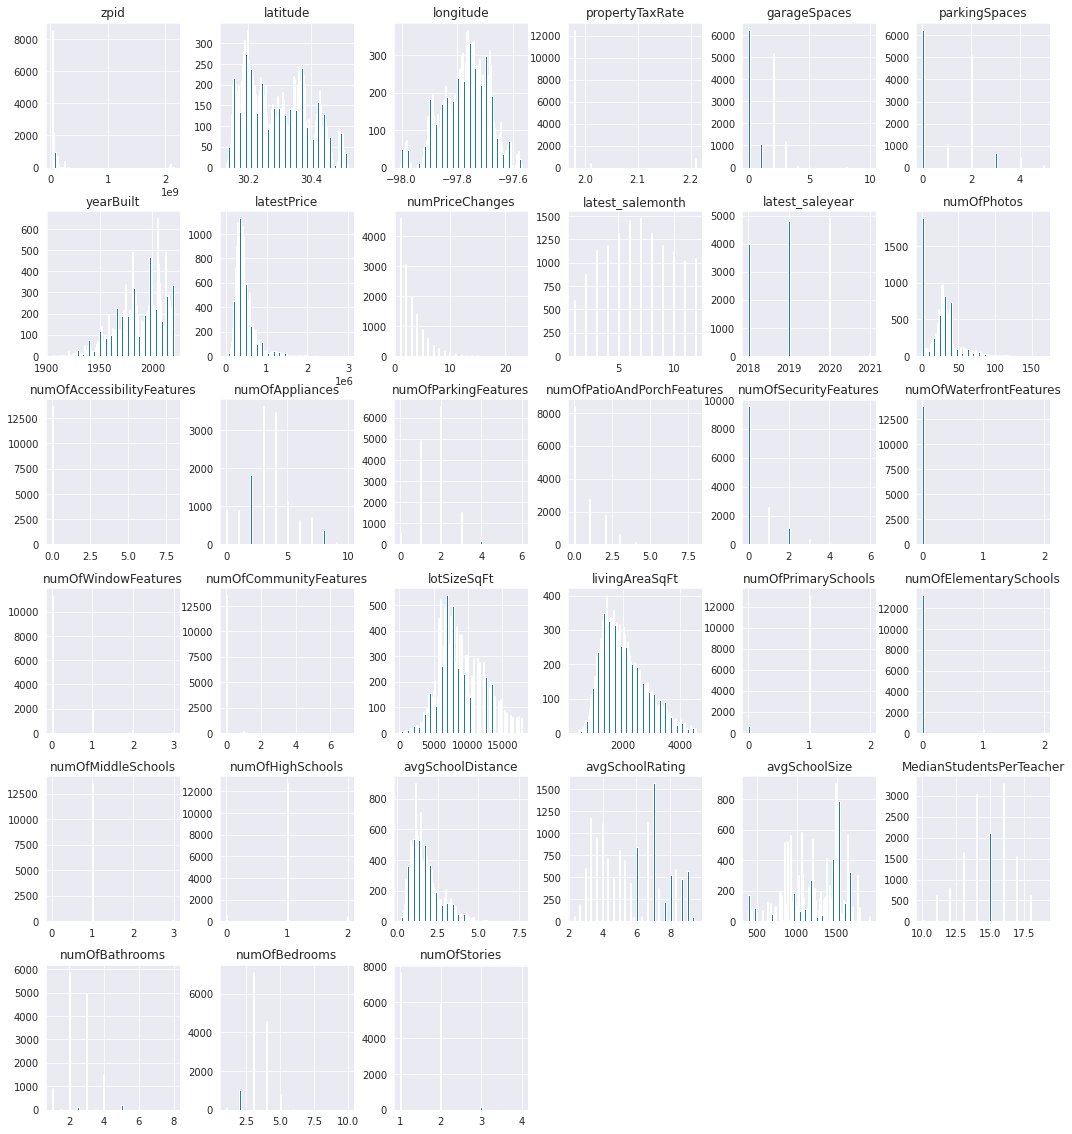

In [28]:
data.hist(figsize=(18,20), bins=100)

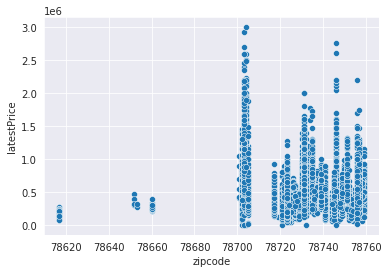

In [29]:
sns.scatterplot(data=data, x="zipcode", y="latestPrice")

# It appears we have some unusual prices around the smallest zip code. Let's find out what zip code that is.

In [30]:
min_zip = data.loc[data['zipcode'].idxmin()]
min_zip

zpid                                                                   83827468
city                                                                  del valle
streetAddress                                              6808 Plains Crest Dr
zipcode                                                                   78617
description                   Beautiful 3 bed 2.5 bath home in great locatio...
latitude                                                              30.160702
longitude                                                            -97.638123
propertyTaxRate                                                            1.98
garageSpaces                                                                  2
hasAssociation                                                             True
hasCooling                                                                 True
hasGarage                                                                  True
hasHeating                              

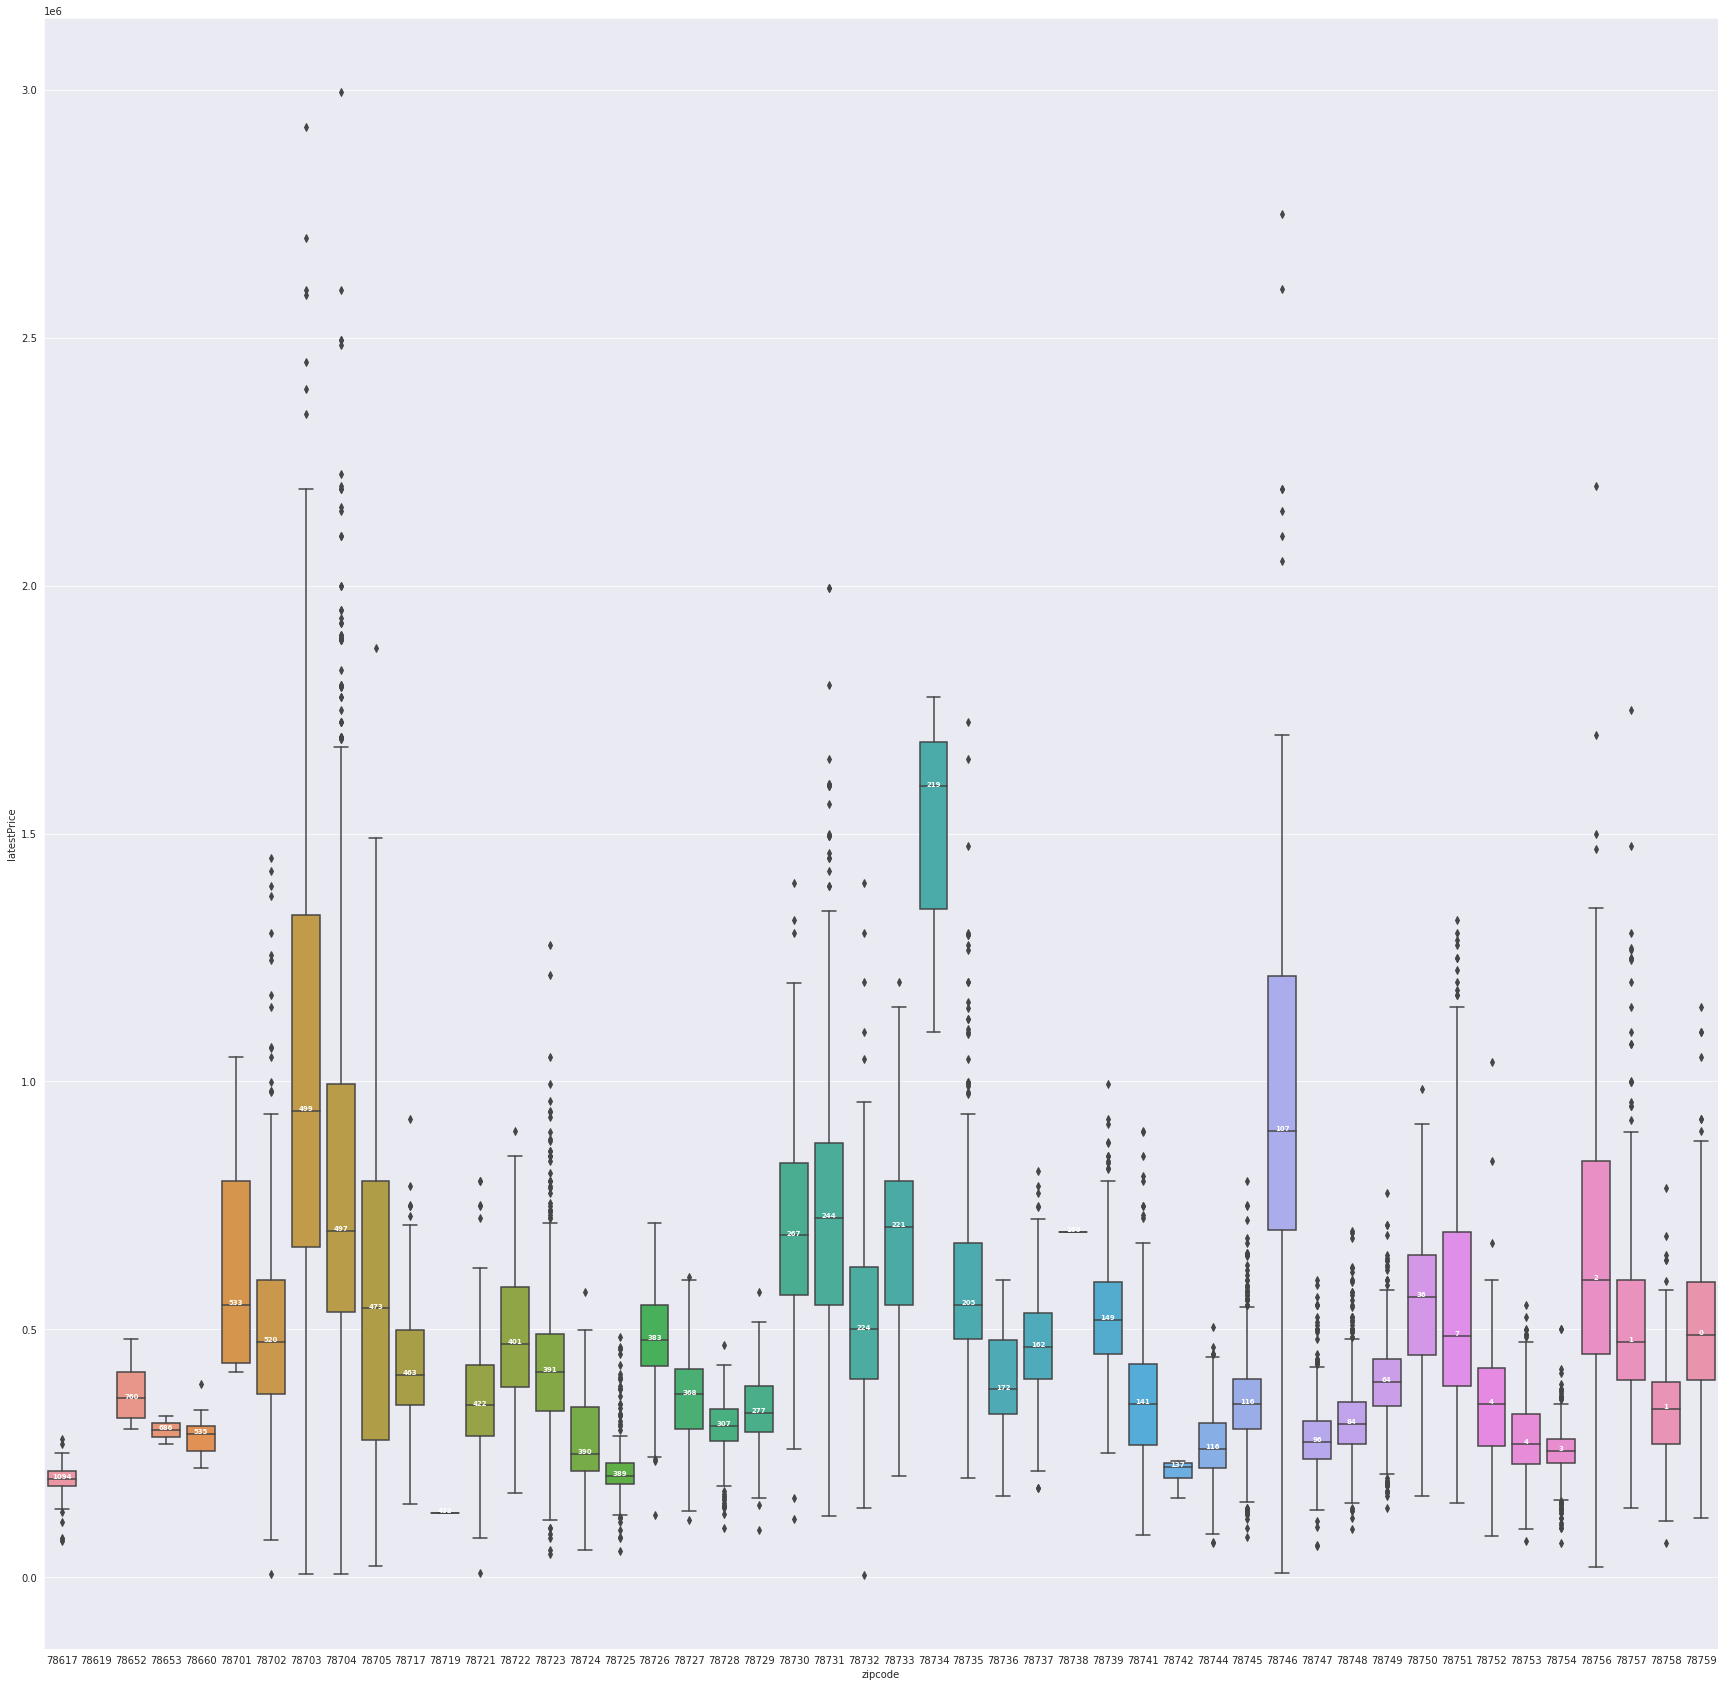

In [31]:
plt.figure(figsize=(30,30))
ax = sns.boxplot(data=data, x="zipcode", y="latestPrice")
medians = data.groupby(['zipcode'])['latestPrice'].median().values

nobs = data['zipcode'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]

pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick], nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='semibold')

In [38]:
# Dropping outliers from zipcode 78734
data.drop(data[data['zipcode']==78734].index, inplace=True)

In [41]:
# Get the numeric cols
numerics = data.select_dtypes(['float64','int64']).columns.tolist()
numerics

['zpid',
 'latitude',
 'longitude',
 'propertyTaxRate',
 'garageSpaces',
 'parkingSpaces',
 'yearBuilt',
 'latestPrice',
 'numPriceChanges',
 'latest_salemonth',
 'latest_saleyear',
 'numOfPhotos',
 'numOfAccessibilityFeatures',
 'numOfAppliances',
 'numOfParkingFeatures',
 'numOfPatioAndPorchFeatures',
 'numOfSecurityFeatures',
 'numOfWaterfrontFeatures',
 'numOfWindowFeatures',
 'numOfCommunityFeatures',
 'lotSizeSqFt',
 'livingAreaSqFt',
 'numOfPrimarySchools',
 'numOfElementarySchools',
 'numOfMiddleSchools',
 'numOfHighSchools',
 'avgSchoolDistance',
 'avgSchoolRating',
 'avgSchoolSize',
 'MedianStudentsPerTeacher',
 'numOfBathrooms',
 'numOfBedrooms',
 'numOfStories']

In [42]:
# remove unwanted numerics
numerics = [
 'propertyTaxRate',
 'garageSpaces',
 'parkingSpaces',
 'numOfAccessibilityFeatures',
 'numOfAppliances',
 'numOfParkingFeatures',
 'numOfPatioAndPorchFeatures',
 'numOfSecurityFeatures',
 'numOfWaterfrontFeatures',
 'numOfWindowFeatures',
 'numOfCommunityFeatures',
 'lotSizeSqFt',
 'livingAreaSqFt',
 'numOfPrimarySchools',
 'numOfElementarySchools',
 'numOfMiddleSchools',
 'numOfHighSchools',
 'avgSchoolDistance',
 'avgSchoolRating',
 'avgSchoolSize',
 'MedianStudentsPerTeacher',
 'numOfBathrooms',
 'numOfBedrooms',
 'numOfStories']

In [45]:
X =data[numerics]

# Create target variable
y = data['latestPrice']

# Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

In [46]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression

# Create linear regression object
regressor = LinearRegression()

# Fit model to training data
regressor.fit(X_train,y_train)

LinearRegression()

In [47]:
y_pred = regressor.predict(X_test)

In [48]:
# Score It
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 125077.29296499952
MSE: 36830263939.01306
RMSE: 191912.12556535625


In [49]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.41902143826374305


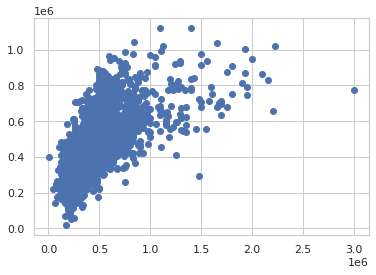

In [50]:
# Actual v predictions scatter
plt.scatter(y_test, y_pred)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


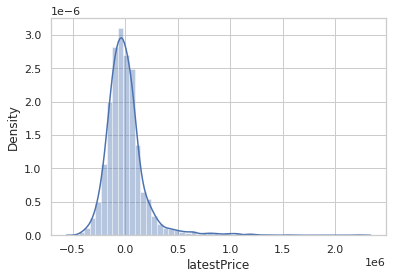

In [51]:
# Histogram of the distribution of residuals
sns.distplot((y_test - y_pred))

In [52]:
cdf = pd.DataFrame(data = regressor.coef_, index = X.columns, columns = ['Coefficients'])
cdf

,Coefficients
propertyTaxRate,-915825.959343
garageSpaces,12110.635373
parkingSpaces,-24959.639559
numOfAccessibilityFeatures,39342.063301
numOfAppliances,470.377643
numOfParkingFeatures,42748.833579
numOfPatioAndPorchFeatures,21479.449855
numOfSecurityFeatures,-118.367502
numOfWaterfrontFeatures,119790.079969
numOfWindowFeatures,-11861.473080
